# Exploratory data analysis

In [15]:
import pandas as pd
#import modin.pandas as pd # FASTER for large datasets
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_palette("pastel")

In [16]:
# final dataframe
df = pd.read_parquet("data/final/df.parquet")

In [17]:
df.head(10)

,station_name,hour,departures,arrivals,hour_extract,temperature_2m,weather_code,rain,precipitation,snowfall,...,var_sum_station_nonnight,avg_sum_station_holiday,var_sum_station_holiday,avg_sum_station_commute,var_sum_station_commute,avg_sum_station_free,var_sum_station_free,avg_sum_station_unfriendly_weather,var_sum_station_unfriendly_weather,cluster
0,10th & E St NW,0,0.0,0.0,0,11.936000,51.0,0.2,0.2,0.0,...,15.351129,2.660256,14.983882,3.992523,16.957668,2.487069,12.603498,2.55168,11.25476,5
1,10th & E St NW,1,0.0,0.0,1,11.486000,0.0,0.0,0.0,0.0,...,15.351129,2.660256,14.983882,3.992523,16.957668,2.487069,12.603498,2.55168,11.25476,5
2,10th & E St NW,2,0.0,0.0,2,11.036000,0.0,0.0,0.0,0.0,...,15.351129,2.660256,14.983882,3.992523,16.957668,2.487069,12.603498,2.55168,11.25476,5
3,10th & E St NW,3,1.0,0.0,3,10.786000,1.0,0.0,0.0,0.0,...,15.351129,2.660256,14.983882,3.992523,16.957668,2.487069,12.603498,2.55168,11.25476,5
4,10th & E St NW,4,0.0,0.0,4,10.536000,0.0,0.0,0.0,0.0,...,15.351129,2.660256,14.983882,3.992523,16.957668,2.487069,12.603498,2.55168,11.25476,5
5,10th & E St NW,5,0.0,0.0,5,10.136001,3.0,0.0,0.0,0.0,...,15.351129,2.660256,14.983882,3.992523,16.957668,2.487069,12.603498,2.55168,11.25476,5
6,10th & E St NW,6,0.0,0.0,6,9.636001,2.0,0.0,0.0,0.0,...,15.351129,2.660256,14.983882,3.992523,16.957668,2.487069,12.603498,2.55168,11.25476,5
7,10th & E St NW,7,0.0,1.0,7,8.336000,3.0,0.0,0.0,0.0,...,15.351129,2.660256,14.983882,3.992523,16.957668,2.487069,12.603498,2.55168,11.25476,5
8,10th & E St NW,8,0.0,0.0,8,8.236000,3.0,0.0,0.0,0.0,...,15.351129,2.660256,14.983882,3.992523,16.957668,2.487069,12.603498,2.55168,11.25476,5
9,10th & E St NW,9,0.0,0.0,9,8.586000,3.0,0.0,0.0,0.0,...,15.351129,2.660256,14.983882,3.992523,16.957668,2.487069,12.603498,2.55168,11.25476,5


## Features

### All variables

In [4]:
# Group & print variables by data type
feature_types = {}
for col in df.columns:
    dtype = str(df[col].dtype)
    if dtype not in feature_types:
        feature_types[dtype] = []
    feature_types[dtype].append(col)

print("Features by data type:")
for dtype, features in feature_types.items():
    print(f"\n{dtype} ({len(features)} features):")
    for feature in features:
        print(f"  - {feature}")
    
print("\n\nBasic dataset statistics:")
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")
print(f"Number of unique stations: {df['station_name'].nunique()}")
print(f"Time range: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f"Number of clusters: {df['cluster'].nunique()}")

Features by data type:

object (3 features):
  - station_name
  - weather_cluster
  - has_kiosk

int32 (9 features):
  - hour
  - hour_extract
  - weekday
  - day
  - month
  - year
  - dayofweek
  - dayofyear
  - cluster

float64 (64 features):
  - departures
  - arrivals
  - sunrise
  - sunset
  - latitude
  - longitude
  - delta
  - var_delta_station_total
  - avg_delta_station_total
  - avg_arrivals_station_total
  - avg_departures_station_total
  - var_arrivals_station_total
  - var_departures_station_total
  - avg_delta_station_night
  - var_delta_station_night
  - avg_arrivals_station_night
  - var_arrivals_station_night
  - avg_departures_station_night
  - var_departures_station_night
  - avg_delta_station_nonnight
  - var_delta_station_nonnight
  - avg_arrivals_station_nonnight
  - var_arrivals_station_nonnight
  - avg_departures_station_nonnight
  - var_departures_station_nonnight
  - avg_delta_station_holiday
  - var_delta_station_holiday
  - avg_arrivals_station_holiday
  -

### Exploring delta vs. departures/arrivals/sums

In [5]:
departures = (df['departures'] == 0).mean()
print(f"Share of zeros: {departures:.2f}")

Share of zeros: 0.77


In [6]:
arrivals = (df['arrivals'] == 0).mean()
print(f"Share of zeros: {arrivals:.2f}")

Share of zeros: 0.77


In [7]:
sum = (df['sum'] == 0).mean()
print(f"Share of zeros: {sum:.2f}")

Share of zeros: 0.69


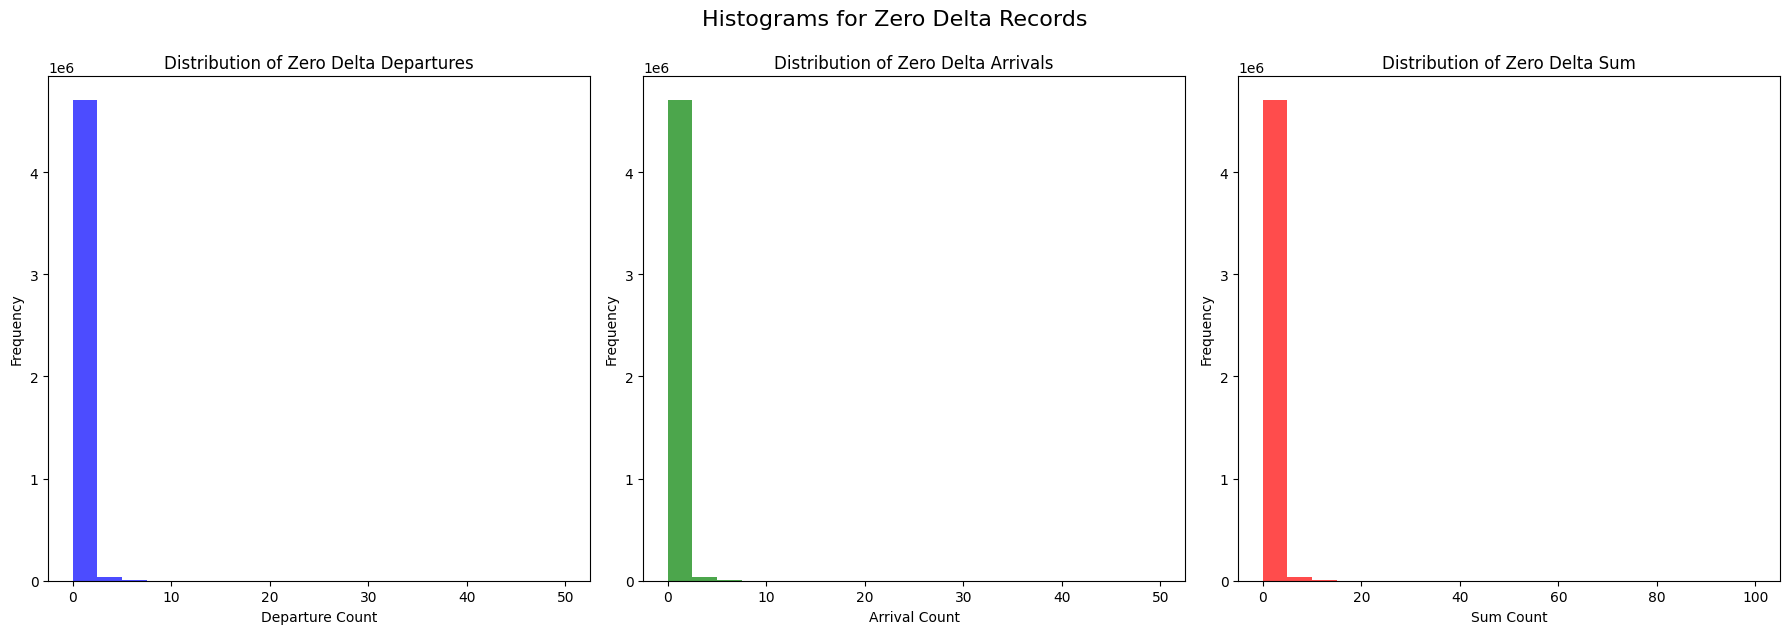

In [8]:
foo = df[df['delta'] == 0][['delta', 'departures', 'arrivals', 'sum']]

# Create a figure with 3 subplots for histogram analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot histograms for each column
axes[0].hist(foo['departures'], bins=20, alpha=0.7, color='blue')
axes[0].set_title('Distribution of Zero Delta Departures')
axes[0].set_xlabel('Departure Count')
axes[0].set_ylabel('Frequency')

axes[1].hist(foo['arrivals'], bins=20, alpha=0.7, color='green')
axes[1].set_title('Distribution of Zero Delta Arrivals')
axes[1].set_xlabel('Arrival Count')
axes[1].set_ylabel('Frequency')

axes[2].hist(foo['sum'], bins=20, alpha=0.7, color='red')
axes[2].set_title('Distribution of Zero Delta Sum')
axes[2].set_xlabel('Sum Count')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Histograms for Zero Delta Records', y=1.05, fontsize=16)
plt.show()

## Cluster

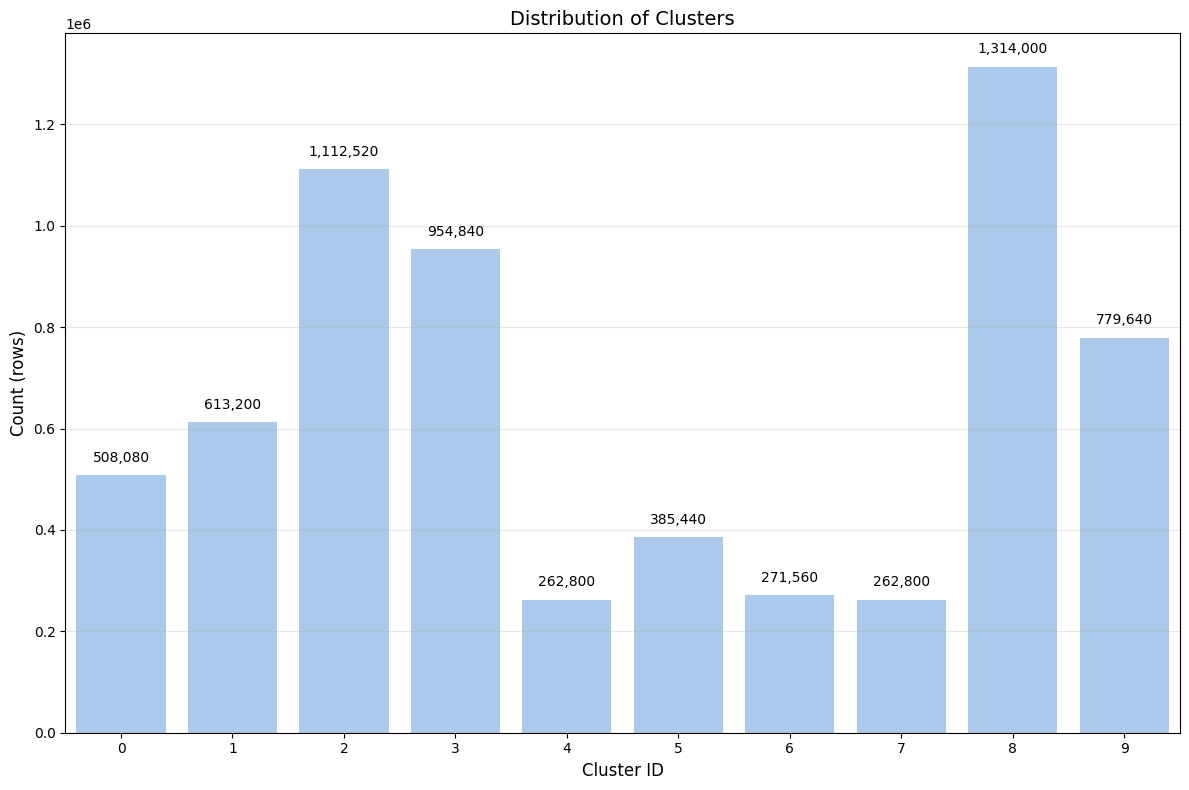

In [9]:
cluster = df['cluster'].value_counts().reset_index()

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='cluster', y='count', data=cluster)

# Add count labels on top of each bar
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 20000,
            f'{int(height):,}',
            ha='center', va='bottom', fontsize=10)

plt.title('Distribution of Clusters', fontsize=14)
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Count (rows)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

## Features

In [10]:
y = df['departures']
X = df.drop(columns=['timestamp', 'station_name', 'cluster', 'delta'])

In [11]:
X.head()

,hour,departures,arrivals,hour_extract,temperature_2m,weather_code,rain,precipitation,snowfall,cloud_cover,...,avg_sum_station_nonnight,var_sum_station_nonnight,avg_sum_station_holiday,var_sum_station_holiday,avg_sum_station_commute,var_sum_station_commute,avg_sum_station_free,var_sum_station_free,avg_sum_station_unfriendly_weather,var_sum_station_unfriendly_weather
0,0,0.0,0.0,0,11.936,51.0,0.2,0.2,0.0,20.0,...,3.945305,15.351129,2.660256,14.983882,3.992523,16.957668,2.487069,12.603498,2.55168,11.25476
1,1,0.0,0.0,1,11.486,0.0,0.0,0.0,0.0,0.0,...,3.945305,15.351129,2.660256,14.983882,3.992523,16.957668,2.487069,12.603498,2.55168,11.25476
2,2,0.0,0.0,2,11.036,0.0,0.0,0.0,0.0,4.0,...,3.945305,15.351129,2.660256,14.983882,3.992523,16.957668,2.487069,12.603498,2.55168,11.25476
3,3,1.0,0.0,3,10.786,1.0,0.0,0.0,0.0,34.0,...,3.945305,15.351129,2.660256,14.983882,3.992523,16.957668,2.487069,12.603498,2.55168,11.25476
4,4,0.0,0.0,4,10.536,0.0,0.0,0.0,0.0,18.0,...,3.945305,15.351129,2.660256,14.983882,3.992523,16.957668,2.487069,12.603498,2.55168,11.25476


In [ ]:
corr_df = df.select_dtypes(['int32','int64','float32','float64']).drop(columns=[col for col in df.columns if (col.startswith("var") or col.startswith("avg")) or col in ['cluster']])
correlation_matrix = corr_df.corr(method='pearson')

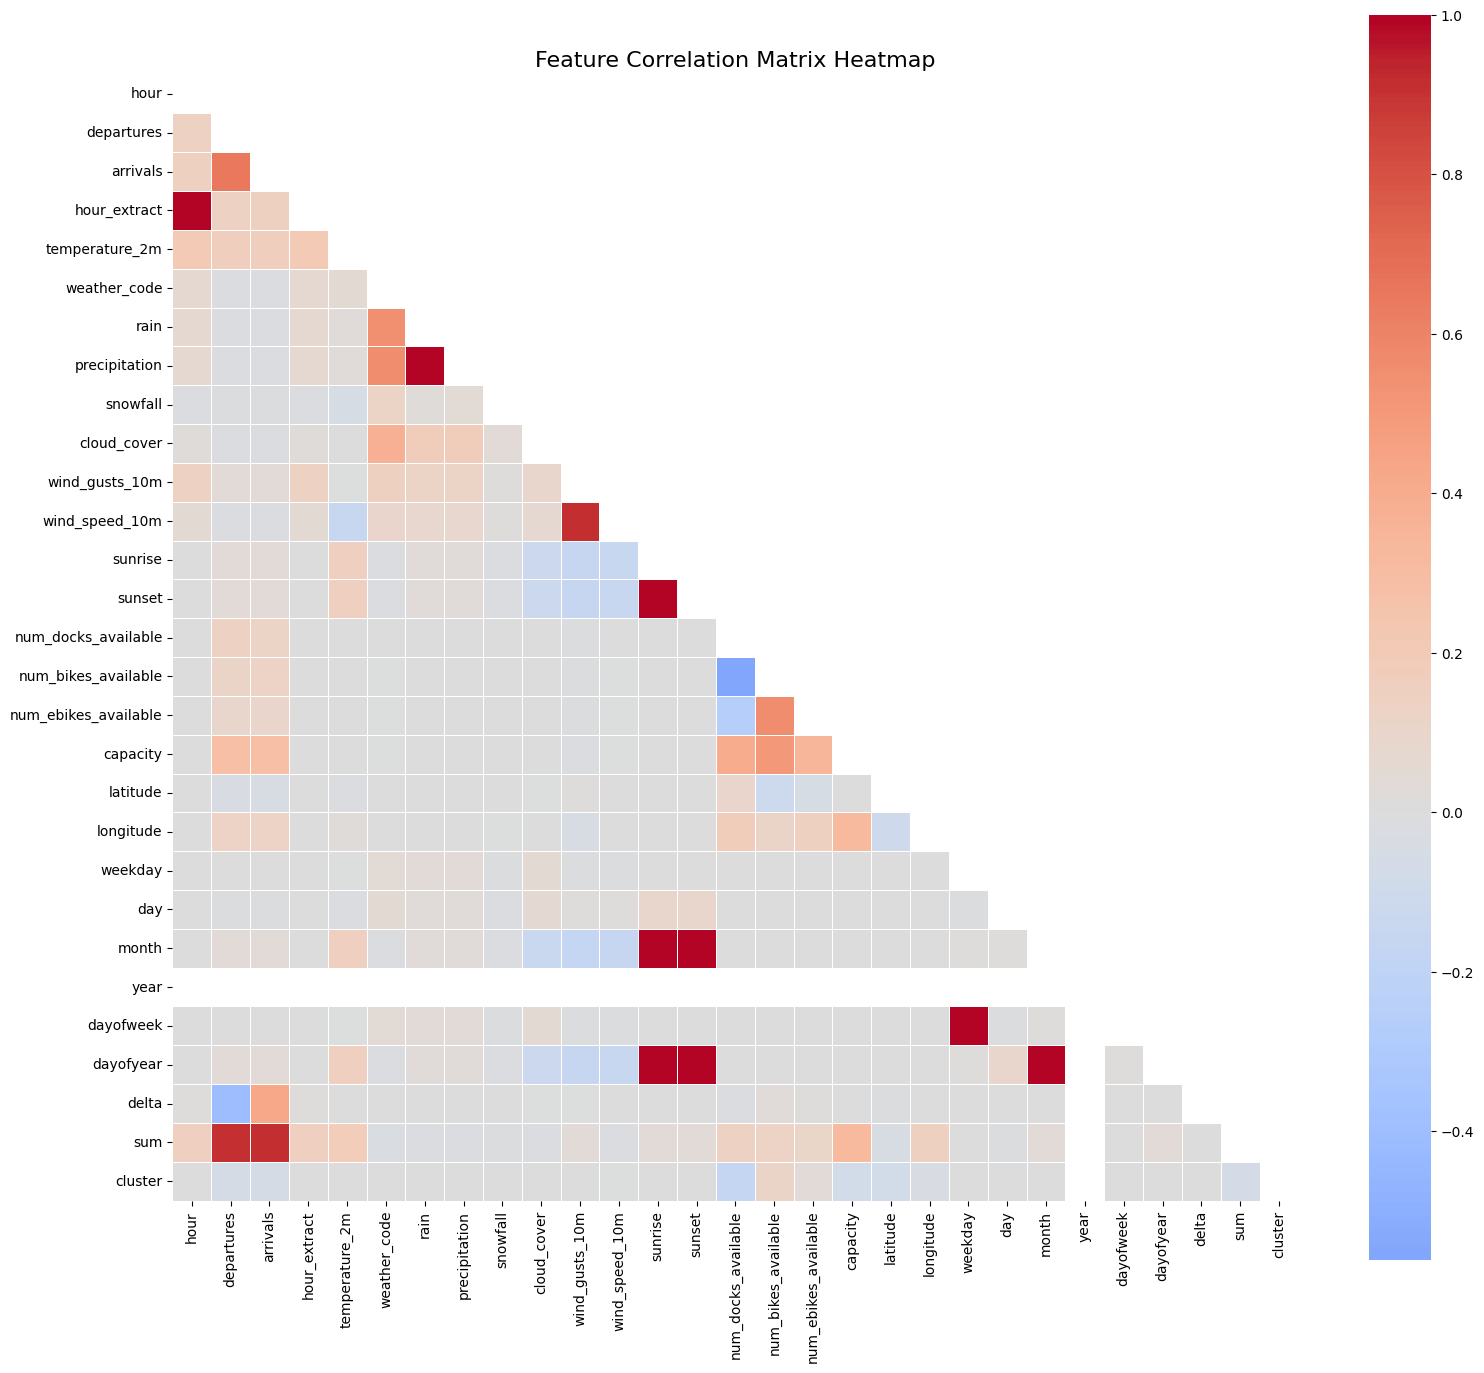

In [14]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(16, 14))

ax = plt.gca()

heatmap = sns.heatmap(correlation_matrix, 
            mask=mask,
            cmap='coolwarm',
            center=0,
            annot=False,  # Keeping this False for large matrices
            linewidths=.5,
            square=True,
            xticklabels=True, 
            yticklabels=True)

ax.set_xticks([x + 0.5 for x in range(len(correlation_matrix.columns))])
ax.set_yticks([y + 0.5 for y in range(len(correlation_matrix.index))])
ax.set_xticklabels(correlation_matrix.columns)
ax.set_yticklabels(correlation_matrix.index)

plt.title('Feature Correlation Matrix Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
threshold = 0.8  # threshold for high correlation

# Get upper triangle indices (excluding diagonal)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
corrs = correlation_matrix.mask(~mask).stack().reset_index()
corrs.columns = ['Feature 1', 'Feature 2', 'Correlation']


high_corr = corrs[abs(corrs['Correlation']) >= threshold].copy()

high_corr = high_corr.sort_values(by='Correlation', key=abs, ascending=False)

print(f"Number of highly correlated pairs (|corr| >= {threshold}): {len(high_corr)}")
print("\nTop 20 highly correlated pairs:")
if len(high_corr) > 0:
    display(high_corr.head(40))

NameError: name 'correlation_matrix' is not defined

## Target

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(y, kde=True, bins=40, color='blue', alpha=0.6, stat='density')

# Limit x-axis to a reasonable range
x_min, x_max = -10, 10
plt.xlim(x_min, x_max)

plt.title('Distribution of Target Variable (delta)', fontsize=14)
plt.xlabel('Delta', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

# Display basic statistics
print(f"Mean: {y.mean():.4f}")
print(f"Median: {y.median():.4f}")
print(f"Min: {y.min():.4f}")
print(f"Max: {y.max():.4f}")
print(f"Standard deviation: {y.std():.4f}")

NameError: name 'y' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
zeros = (y == 0).mean()
print(f"Share of zeros: {zeros:.2f}")

Share of zeros: 0.74


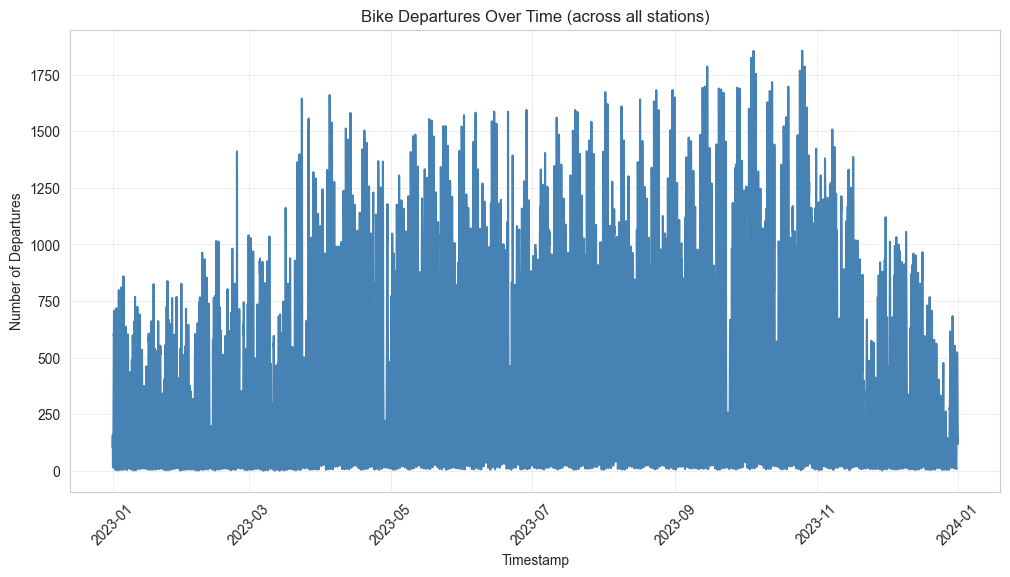

In [35]:
# Calculate average departures per timestamp (across all stations)
sum_departures_ts = df.groupby('timestamp')['departures'].sum().reset_index()

plt.figure(figsize=(12, 6))

# Plot average departures over time
sns.lineplot(x=sum_departures_ts['timestamp'], y=sum_departures_ts['departures'], color='steelblue')
plt.title('Bike Departures Over Time (across all stations)') # Updated title
plt.xlabel('Timestamp')
plt.ylabel('Number of Departures') # Updated y-label
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.savefig('figures/departures_over_year.png')
plt.show()

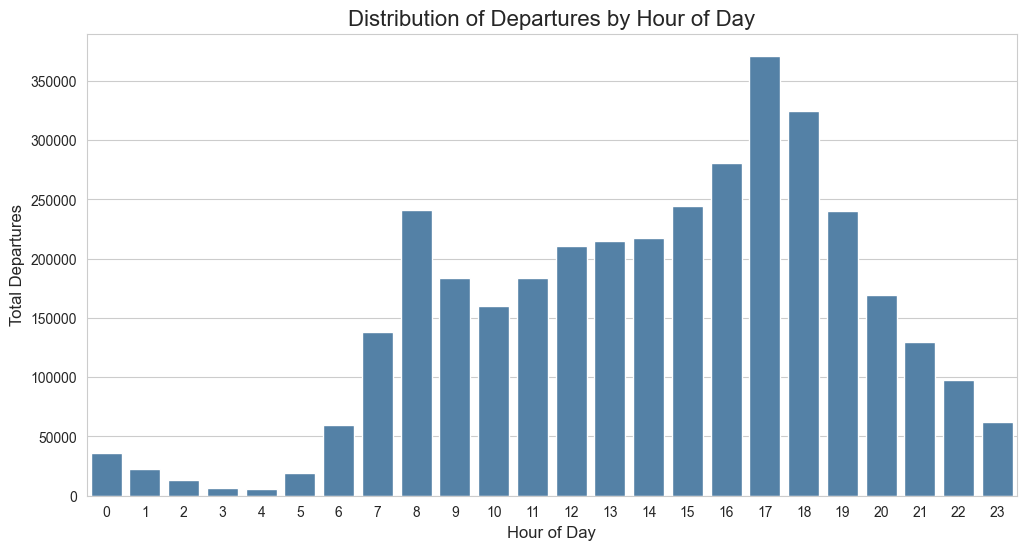

In [ ]:
hourly_totals = df.groupby("hour")["departures"].sum().reset_index()
hourly_totals = hourly_totals.sort_values(by="hour")

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
    
sns.barplot(x="hour", y="departures", data=hourly_totals, color='steelblue')
plt.title('Distribution of Departures by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Total Departures (over all stations)', fontsize=12)
plt.savefig('figures/departures_by_time.png')
plt.show()

## Functional form

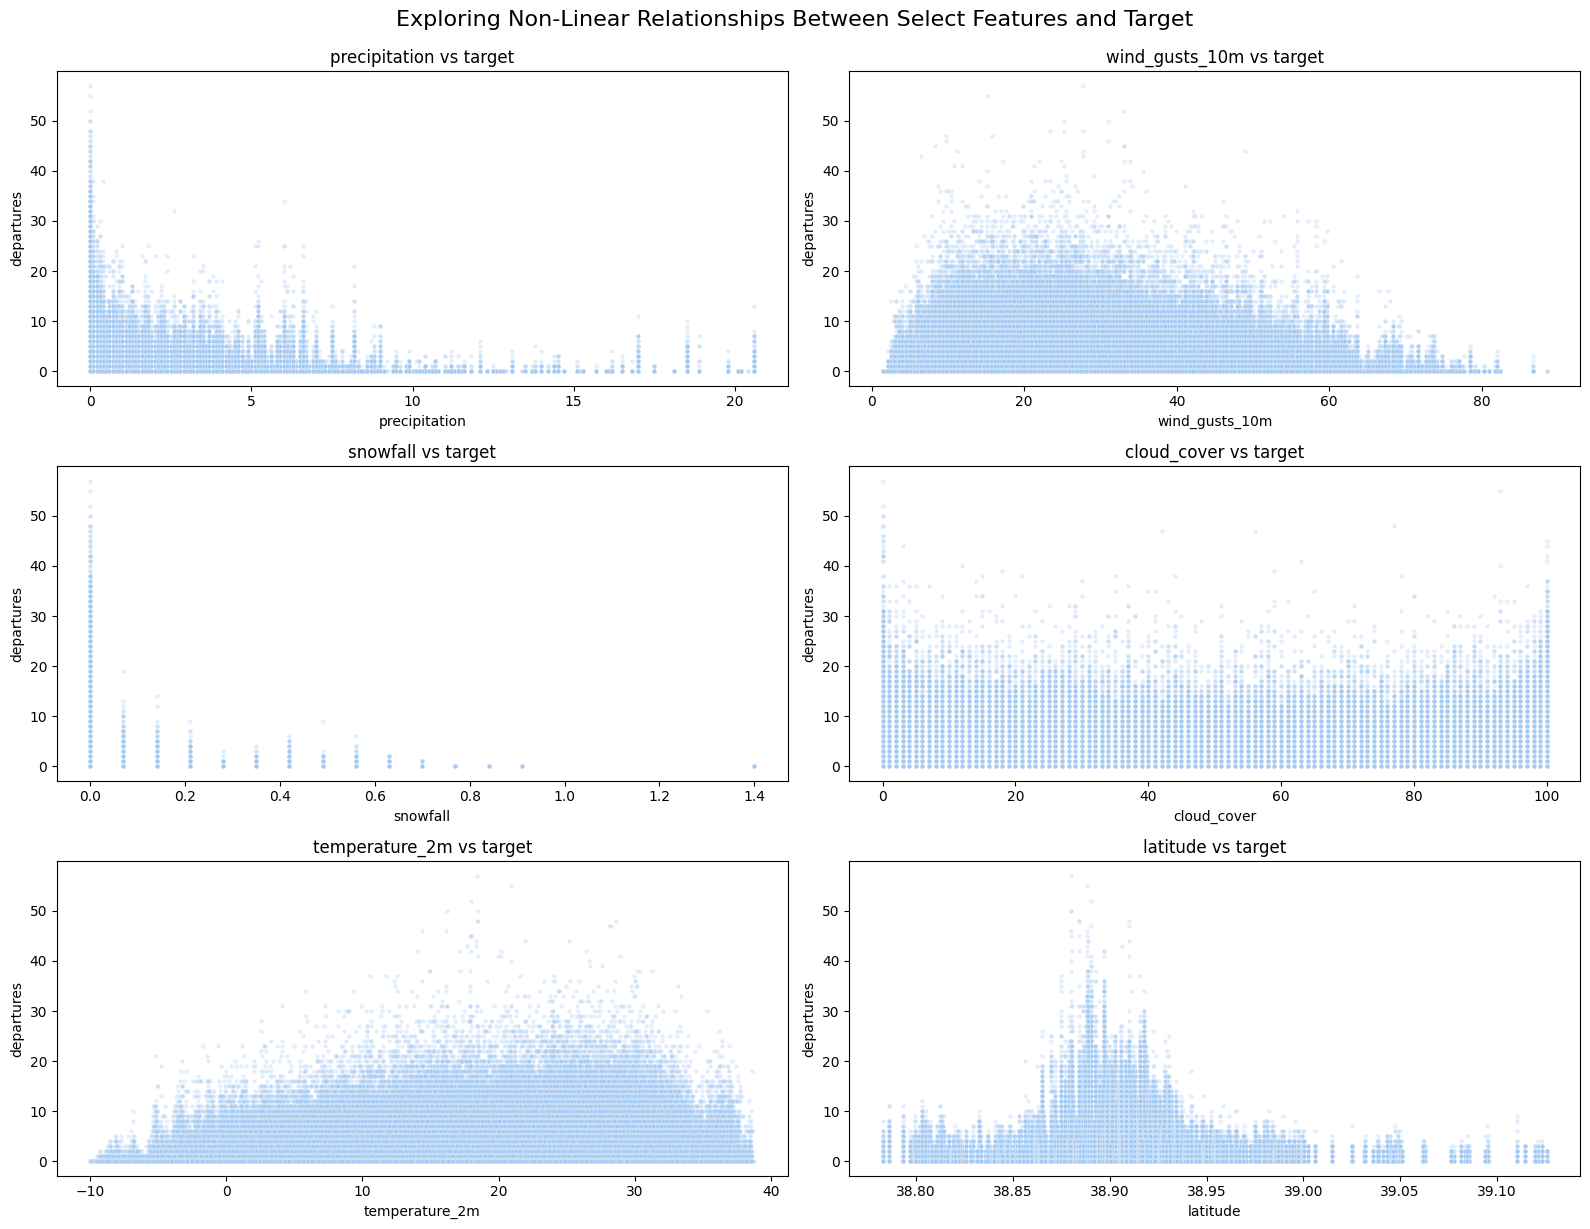

In [ ]:
plt.figure(figsize=(16, 12))

select_feat = X[['precipitation', 'wind_gusts_10m', 'snowfall', 'cloud_cover', 'temperature_2m', 'latitude']]

for i, feature in enumerate(select_feat.columns):
    plt.subplot(3, 2, i+1)
    
    sns.scatterplot(x=X[feature], y=y, alpha=0.3, s=10)
    
    plt.title(f'{feature} vs target')
    plt.xlabel(feature)
    plt.ylabel('departures')
    # plt.legend()

plt.tight_layout()
plt.suptitle('Exploring Non-Linear Relationships Between Select Numerical Features and Target', fontsize=16, y=1.02)
plt.show()

## Stations / Clusters

In [ ]:
# Todo Cluster Map

In [ ]:
# Todo Map with stations colored by activity (by sum(departures != 0)